<a href="https://colab.research.google.com/github/singhvarun404/AIML_2020/blob/master/August_13th_Classification_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
date = 13
topic = "Classification using KNN"
print("Date: August {} \nTopic: {}".format(date,topic))

Date: August 13 
Topic: Classification using KNN


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Importing Iris datasheet and processing it**

In [ ]:
iris_df = pd.read_csv("Iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris_df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [ ]:
x_feat = iris_df.iloc[:,1:5].values
x_feat.shape

(150, 4)

In [ ]:
y_tar = iris_df.iloc[:,5].values
###y_tar = y_tar.reshape(len(y_tar),1)
y_tar.shape

(150,)

**Splitting the dataset into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_feat_train, x_feat_test, y_tar_train, y_tar_test = train_test_split(x_feat, y_tar, test_size = 0.2,random_state = 3)
y_train = pd.DataFrame(y_tar_train)
y_train[0].value_counts()

Iris-setosa        40
Iris-virginica     40
Iris-versicolor    40
Name: 0, dtype: int64

**Generating the model**

In [ ]:
k = int(np.sqrt(len(x_feat_train))/2)   ### Calculating value of k
if k%2 == 0:
  k += 1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=k, p=2)  
### Creating classifier object. 
### Here p=2(default) ---> Eucledean Distance p=2 ---> Manhattan Distance

**Training the model**

In [ ]:
KNN_model.fit(x_feat_train,y_tar_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**Prediction and Testing**

In [ ]:
y_pred = KNN_model.predict(x_feat_test)

In [ ]:
comp_df = pd.DataFrame()
comp_df["Actual Value"] = y_tar_test
comp_df["Predicted Value"] = y_pred

In [ ]:
comp_df.head()

,Actual Value,Predicted Value
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa


**Evaluating metrics**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
iris_acc = accuracy_score(y_tar_test, y_pred)
iris_acc

0.9666666666666667

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matr = confusion_matrix(y_tar_test, y_pred)
conf_matr

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

In [ ]:
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [ ]:
Acc_for_k = []
Err_for_k = []
for k in range(1,50,2):
  KNN_model = KNeighborsClassifier(n_neighbors=k, p=2)
  KNN_model.fit(x_feat_train,y_tar_train)
  y_tpred = KNN_model.predict(x_feat_test)
  Acc_for_k.append(accuracy_score(y_tar_test,y_tpred))
  Err_for_k.append(1-accuracy_score(y_tar_test,y_tpred)) 

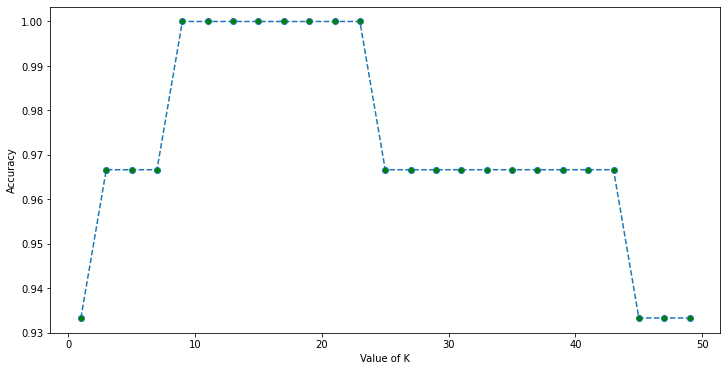

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,50,2),Acc_for_k,linestyle='dashed',marker='o',markerfacecolor='green')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.show()

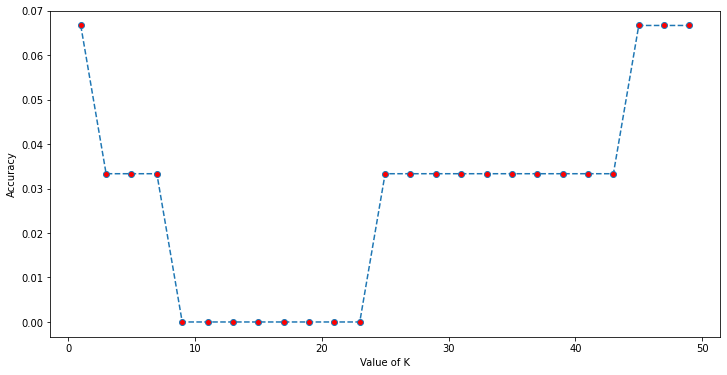

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,50,2),Err_for_k,linestyle='dashed',marker='o',markerfacecolor='red')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.show()